In [10]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np
import json

In [11]:

def MED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors)

def NMED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.median(errors) / (np.max(actual) - np.min(actual))

def MRED(actual, predicted):
    errors = np.abs(actual - predicted)
    return np.mean(errors / actual)

C:\Users\flori\AppData\Local\Temp\ipykernel_8728\243978891.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10((pic_list[0].max()**2) /mse),2)
C:\Users\flori\AppData\Local\Temp\ipykernel_8728\1891033658.py:11: RuntimeWarning: invalid value encountered in divide
  return np.mean(errors / actual)
C:\Users\flori\AppData\Local\Temp\ipykernel_8728\1891033658.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.mean(errors / actual)


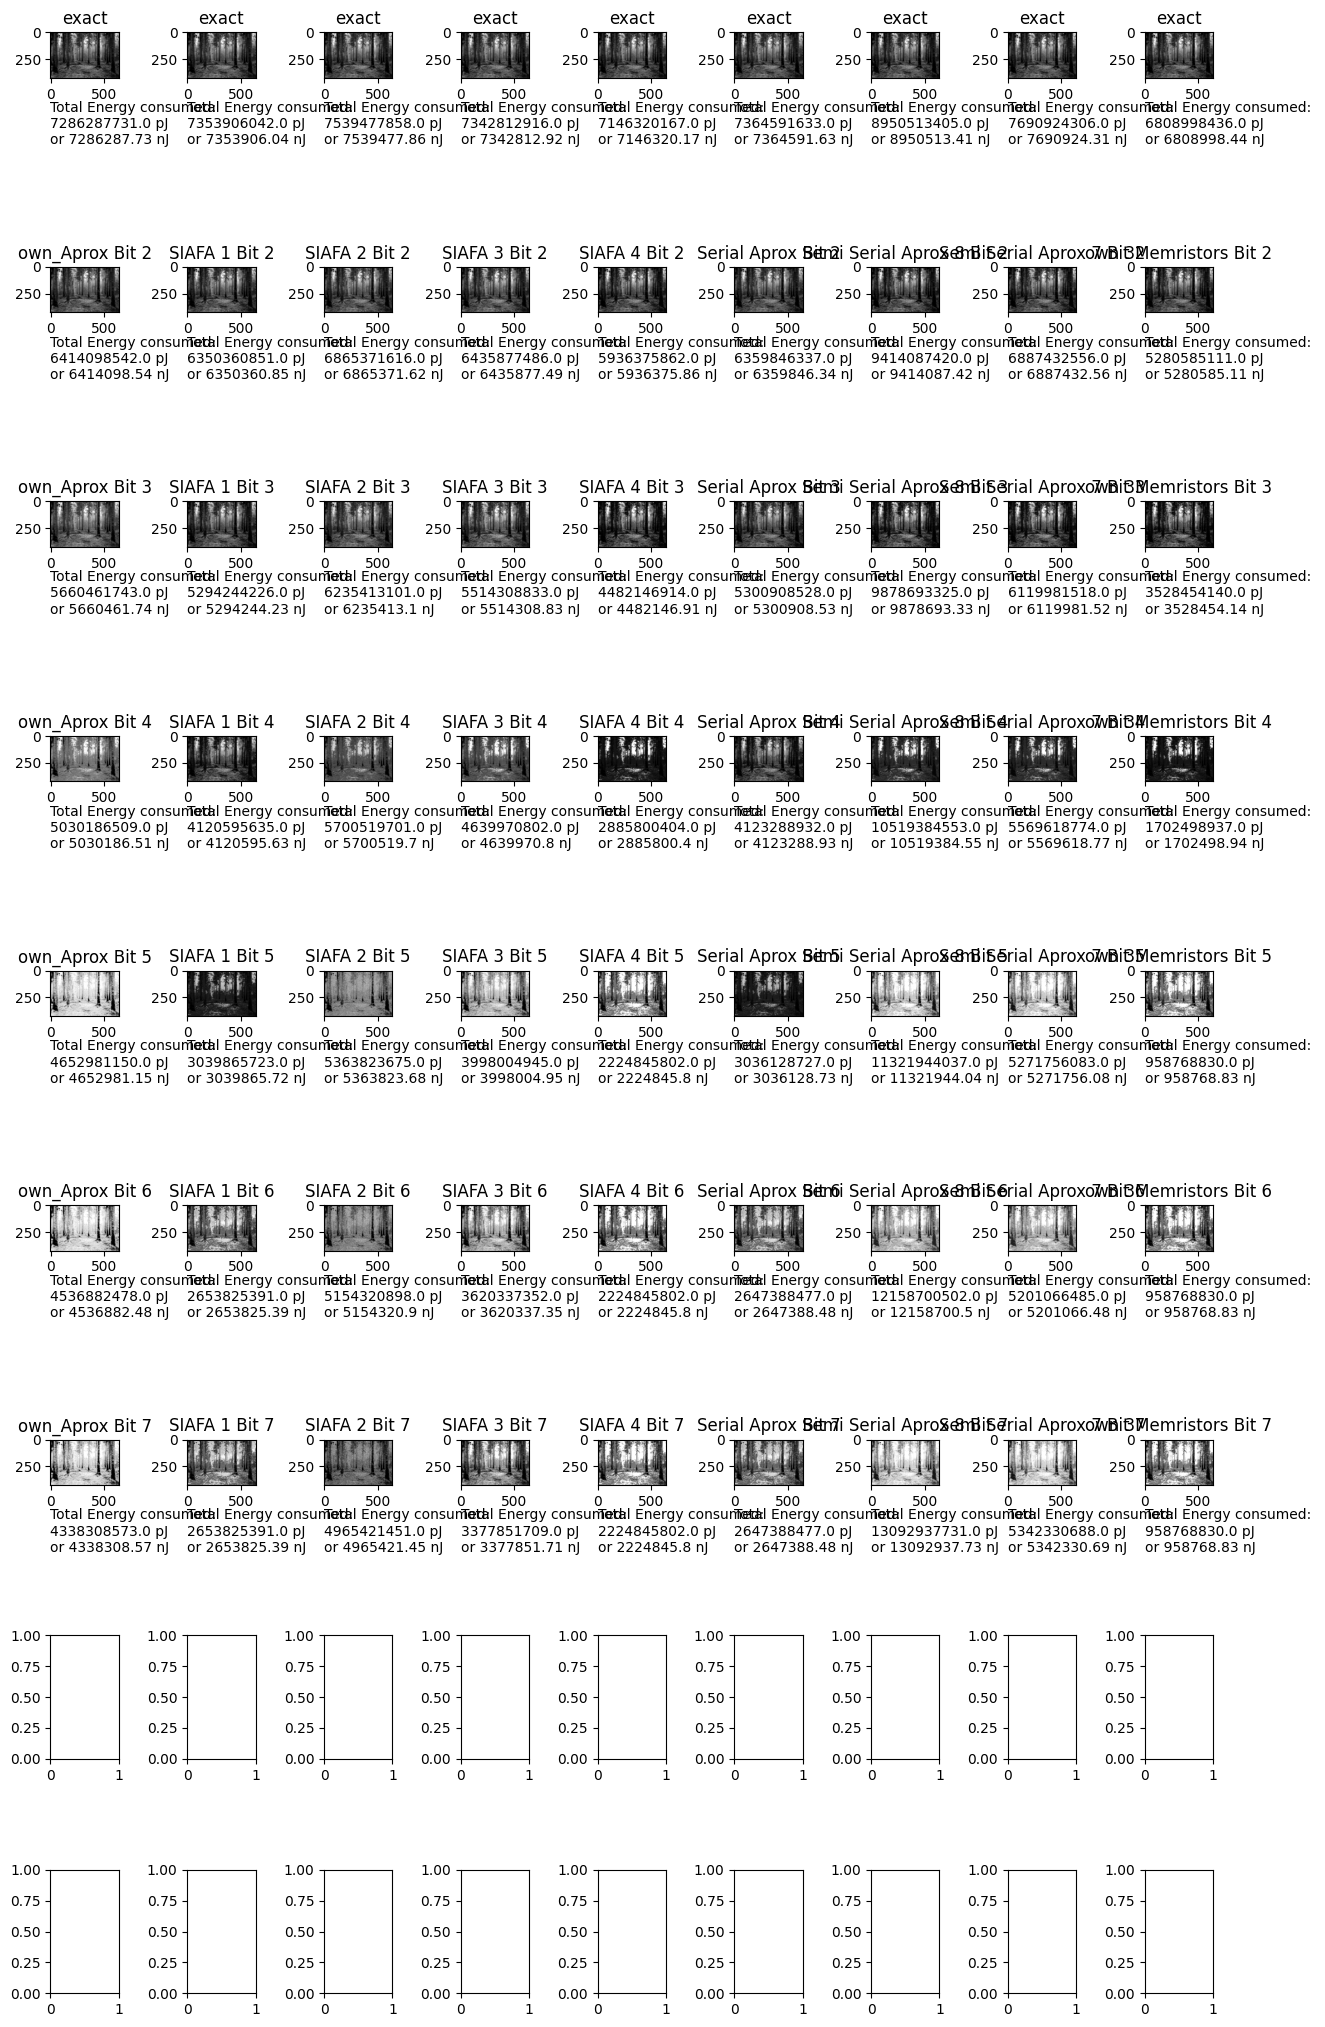

In [12]:
parsed_data = {}
rows = 9
coll = 9
maxBitApprox = 8
bit_list = range(1, maxBitApprox)

empty_list = [0,0,0,0,0, 0,0,0]

kernelname_list = []
kernelname_list.append("blurring")
kernelname_list.append("edge_Detection")

algo_list = ["own_Aprox","SIAFA 1","SIAFA 2","SIAFA 3","SIAFA 4","Serial Aprox","Semi Serial Aprox 8", "Semi Serial Aprox 7","own 3Memristors"]

for i, name in enumerate(algo_list):
    parsed_data[name] = {"ssi": empty_list, "psnr": empty_list, "energy_con": empty_list, "med": empty_list, "nmed": empty_list, "mred": empty_list}

# load data from jsonfile 
with open('data.json', 'w') as json_file:
    json.dump(parsed_data, json_file, indent=4)
# Load the data from the JSON file into a dictionary
with open('data.json', 'r') as json_file:
    loadedDict = json.load(json_file)


fig, axs = plt.subplots(rows, coll, figsize=(15, 5))  # 5 rows, 1 column
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
for indexAlgo, approxAlgo in enumerate(algo_list):
    pic_list = []
    energy_list = []
    # loop throw all Algorithm
    for indexBit, approxBit in enumerate(bit_list):
        # show picture in subplot

        with open(f'data_blurring/{approxAlgo}_{indexBit}.json', 'r') as json_file:
            energy_list.append(json.load(json_file))

        pic_list.append(io.imread(f"data_blurring/outputimage_{approxAlgo}_{indexBit}.png", as_gray=True))

        axs[indexBit,indexAlgo].imshow(pic_list[-1], cmap = "gray")
        # Add an annotation to the subplot
        axs[indexBit,indexAlgo].annotate(f"\nTotal Energy consumed: \n{round(energy_list[indexBit],0)} pJ \nor {round(energy_list[indexBit]/10**3,2)} nJ", (0,0), (0,-5),xycoords='axes fraction', textcoords='offset points', va='top')
    
        if indexBit == 0:
            axs[indexBit,indexAlgo].set_title(f"exact")
        else:
            axs[indexBit,indexAlgo].set_title(f"{approxAlgo} Bit {approxBit}")
        try:
            data_range = pic_list[0].max() - pic_list[indexBit].max()  
            mse = np.mean((pic_list[0] - pic_list[indexBit])**2)     
            # load results to dictionary
            loadedDict[approxAlgo]["ssi"][indexBit] = round(ssim(pic_list[0], pic_list[-1], data_range=data_range),2)
            loadedDict[approxAlgo]["psnr"][indexBit] = round(10 * log10((pic_list[0].max()**2) /mse),2)
            loadedDict[approxAlgo]["energy_con"][indexBit] = round(energy_list[indexBit]/10**3,2)
            loadedDict[approxAlgo]["med"][indexBit] = MED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["nmed"][indexBit] = NMED(pic_list[0], pic_list[-1])
            loadedDict[approxAlgo]["mred"][indexBit] = MRED(pic_list[0], pic_list[-1])
            
        except Exception as e:
            print(f'Error plot at: indexBit {indexBit} {e}')
        else:
            continue
# Show the plot
plt.show()


[]

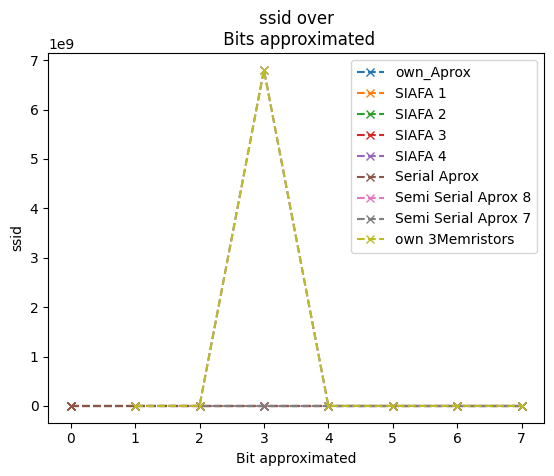

In [13]:
# plot ssid over approximation of different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["ssi"],"x--",  label=algo)
    plt.title(f"ssid over\n Bits approximated")
    plt.xlabel("Bit approximated")
    plt.ylabel("ssid")

plt.legend()
plt.plot()

[]

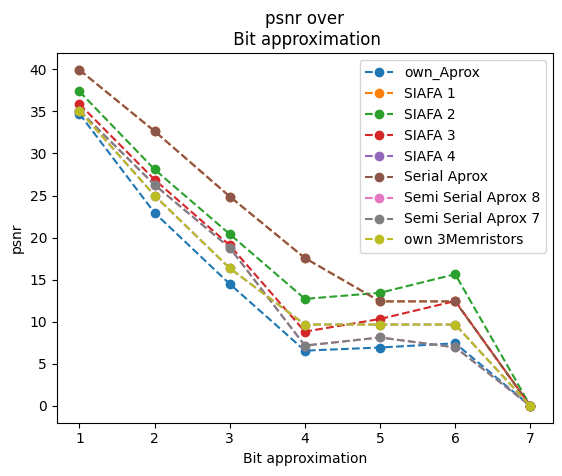

In [14]:
# peak signal to noice ratio over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["psnr"],"o--",  label=algo)
    plt.title(f"psnr over\n Bit approximation")
    plt.xlabel("Bit approximation")
    plt.ylabel("psnr")


plt.legend()
plt.plot()

[]

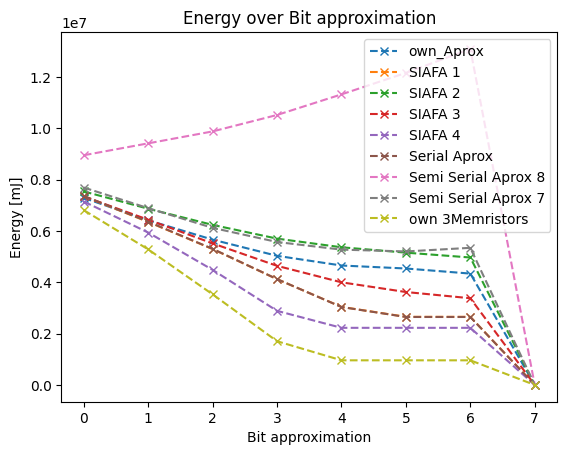

In [15]:
# energy consumption over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["energy_con"],"x--",  label=algo)
    plt.title(f"Energy over Bit approximation")
    plt.xlabel("Bit approximation")
    plt.ylabel("Energy [mJ]")

plt.legend()
plt.plot()

[]

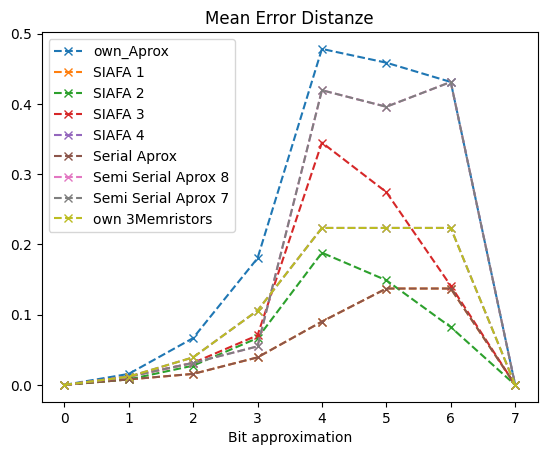

In [16]:
# energy consumption over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["med"],"x--",  label=algo)
    plt.title(f"Mean Error Distanze")
    plt.xlabel("Bit approximation")
    # plt.ylabel("")

plt.legend()
plt.plot()

[]

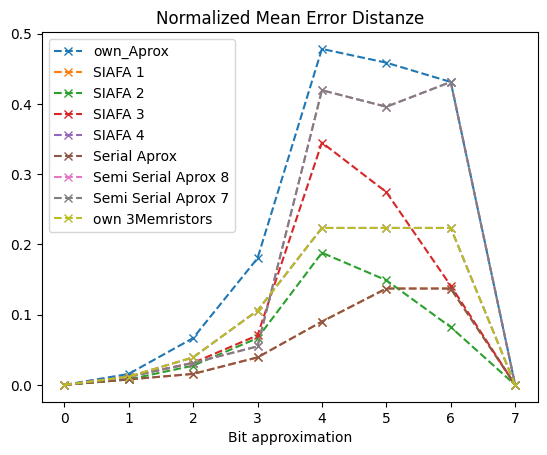

In [17]:
# energy consumption over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["nmed"],"x--",  label=algo)
    plt.title(f"Normalized Mean Error Distanze")
    plt.xlabel("Bit approximation")
    # plt.ylabel("")

plt.legend()
plt.plot()

[]

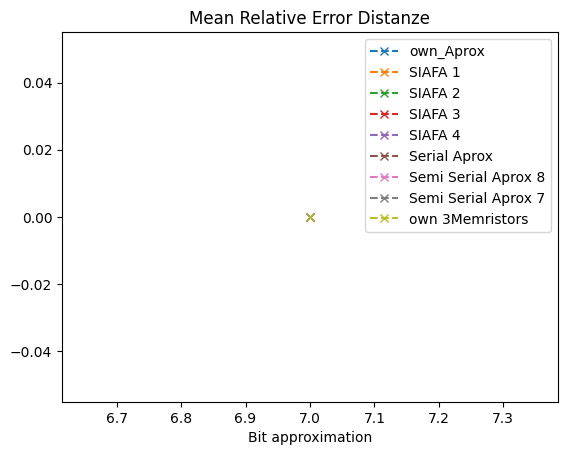

In [18]:
# energy consumption over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loadedDict[algo]["mred"],"x--",  label=algo)
    plt.title(f"Mean Relative Error Distanze")
    plt.xlabel("Bit approximation")
    # plt.ylabel("")

plt.legend()
plt.plot()